# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed

medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram is skewed right so the mean is a good representation of where it should be on the graph (see graph below)
The black dashed lines represent where the values are within a certain number of standard deviations which encompasses the proportion of values well. 

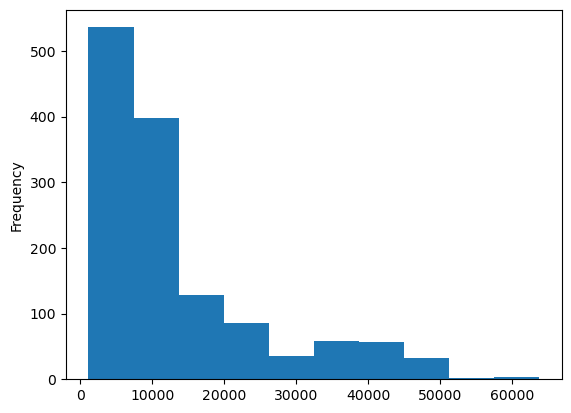

In [4]:
_= medical.charges.plot(kind="hist")

In [5]:
sample_mean = np.mean(medical.charges)
print("sample mean for medical charges: ",sample_mean)
sample_std = np.std(medical.charges)
print("sample standard deviation for medical charges: ",sample_std)

sample mean for medical charges:  13270.422265141257
sample standard deviation for medical charges:  12105.484975561605


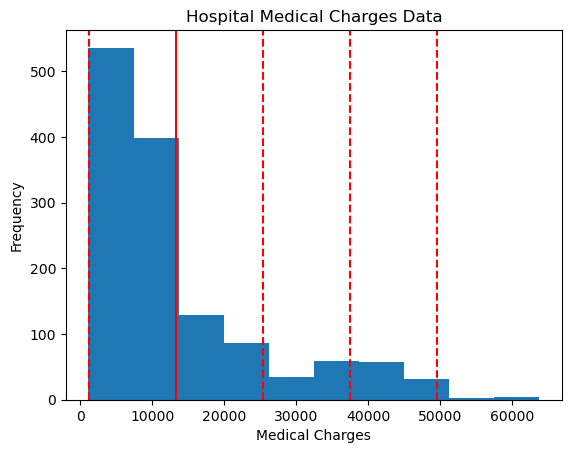

In [52]:
_= medical.charges.plot(kind="hist")
_ = plt.axvline(x = sample_mean, linestyle = '-', color = 'red')
_ = plt.axvline(x = sample_mean-sample_std, linestyle = '--', color = 'red')
_ = plt.axvline(x = sample_mean+sample_std, linestyle = '--', color = 'red')
_ = plt.axvline(x = sample_mean+2*sample_std, linestyle = '--', color = 'red')
_ = plt.axvline(x = sample_mean+3*sample_std, linestyle = '--', color = 'red')
_=plt.xlabel("Medical Charges")
_=plt.ylabel("Frequency")
_=plt.title("Hospital Medical Charges Data")

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The sample size (n=1339) is a good starting indicator that the data will support answering the question of whether the average has fallen or not. A t-statistic would be appropriate since the population standard deviation is unknown. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided interval would be appropriate since the goal is to show that the population mean is less than 12,000.
It would have been two-sided if the purpose was to show it changed in either direction (ie increased or decreased).

In [7]:
#sampling from data
def charges_sampler(n):
    return np.random.choice(medical.charges, n)

#creating a sampling distribution of means
def charges_mean_dist(n, iterations):
    samples = np.empty((iterations,))
    for i in range(iterations):
        samples[i]=np.mean(charges_sampler(n))
    return samples

est. mean:  13242.232786508146


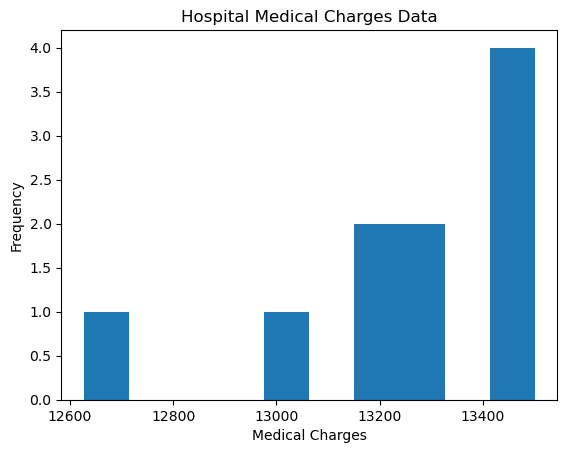

In [54]:
seed(1)
#taking 10 samples
sample_1 = charges_mean_dist(len(medical.charges), 10)
print('est. mean: ',np.mean(sample_1))
_=plt.hist(sample_1, bins=10)
_=plt.xlabel("Medical Charges")
_=plt.ylabel("Frequency")
_=plt.title("Hospital Medical Charges Data")

est. mean:  13282.781418661165


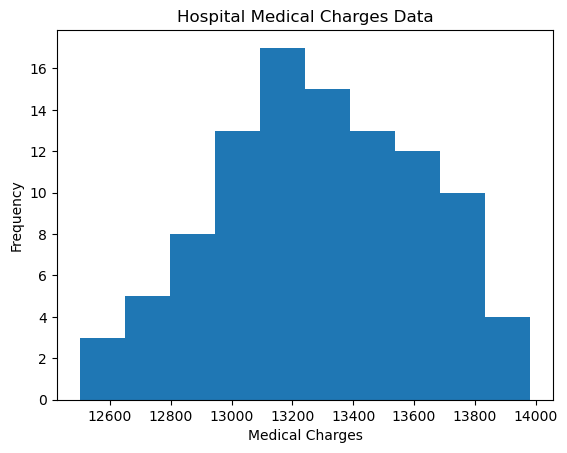

In [56]:
seed(1)
#taking 100 samples
sample_2 = charges_mean_dist(len(medical.charges), 100)
print('est. mean: ',np.mean(sample_2))
_=plt.hist(sample_2,bins=10)
_=plt.xlabel("Medical Charges")
_=plt.ylabel("Frequency")
_=plt.title("Hospital Medical Charges Data")

est. mean:  13278.565415537732


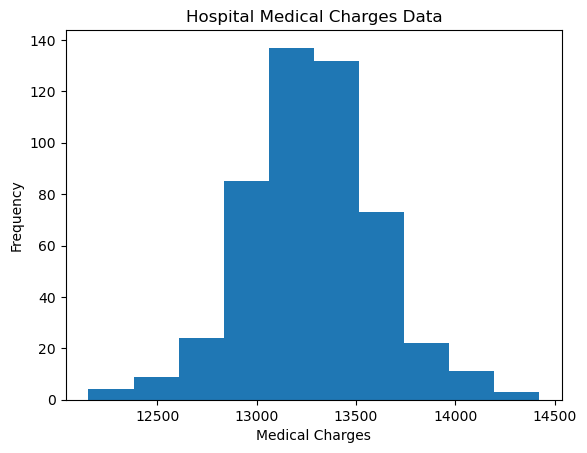

In [55]:
seed(1)
#taking 500 samples
sample_3 = charges_mean_dist(len(medical.charges), 500)
print('est. mean: ',np.mean(sample_3))
_=plt.hist(sample_3, bins=10)
_=plt.xlabel("Medical Charges")
_=plt.ylabel("Frequency")
_=plt.title("Hospital Medical Charges Data")

Using the bootstrap method, 10, 100 and 500 samples were drawn with replacement to create sample mean distributions.  The sample of size 500 produced a normal-like histogram so this sample will be used to find the critical value and calculate the confidence interval.

In [11]:
sample_3_mean = np.mean(sample_3)
print("Mean of sampling distribution: ",sample_3_mean)
sample_3_std = np.std(sample_3)
print("Standard Deviation of sampling distribution: ",sample_3_std)

Mean of sampling distribution:  13278.565415537732
Standard Deviation of sampling distribution:  336.09353571704287


In [91]:
#Calculate the critical value and 95% confidence interval 
#Recall:  A t-statistic would be appropriate since the population variance is unknown (from Q2)

print("95% Confidence interval (using a t score) for medical charges is: [", \
      round(sample_3_mean-(t.ppf(.95, len(sample_3)-1)*10+50)*(sample_3_std/np.sqrt(len(sample_3)))),",",\
      round(sample_3_mean+(t.ppf(.95, len(sample_3)-1)*10+50)*(sample_3_std/np.sqrt(len(sample_3)))),"]")


95% Confidence interval (using a t score) for medical charges is: [ 12279 , 14278 ]


The one-sided test with a 95% confidence interval supports that the administrator should not be concerned with the 
average medicl charge falling below $12,000 since the lower boundary of the interval is above that. 

#### The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis, $h_{0}$, would be that people with insurance are not charged a differrent amount in comparison to those without insurance so, "charge w/ insurance = charge w/o insurance". The alternative hypothesis, $h_{1}$, would be "charge w/ insurance $\not=$ charge w/o insurance"

--

The assumption being made here is that the variance of both groups are equal: $s_{0}$=$s_{1}$ since the pooled standard deviation formula is comparable to weighted averages.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [30]:
# Obtain separate samples and attributes (ie sample size, mean, etc.)

charges_insured = medical[medical.insuranceclaim==1].charges
charges_insured_n = len(charges_insured)
charges_insured_mean = np.mean(charges_insured)
charges_insured_std = np.std(charges_insured)

charges_uninsured = medical[medical.insuranceclaim==0].charges
charges_uninsured_n = len(charges_uninsured)
charges_uninsured_mean = np.mean(charges_uninsured)
charges_uninsured_std = np.std(charges_uninsured)


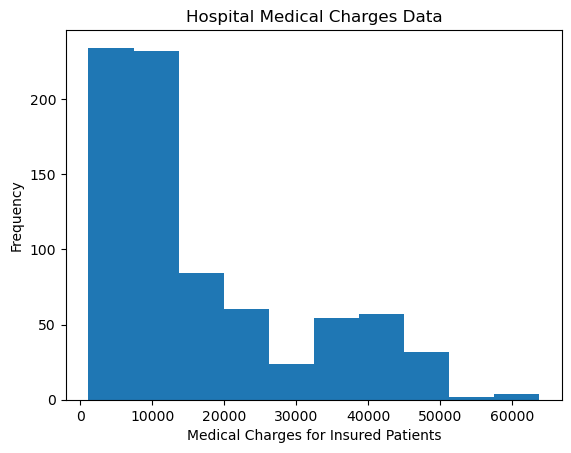

In [59]:
# a look at the histogram for insured patient medical charges

_=plt.hist(charges_insured)
_=plt.title("Hospital Medical Charges Data")
_=plt.xlabel("Medical Charges for Insured Patients")
_=plt.ylabel("Frequency")

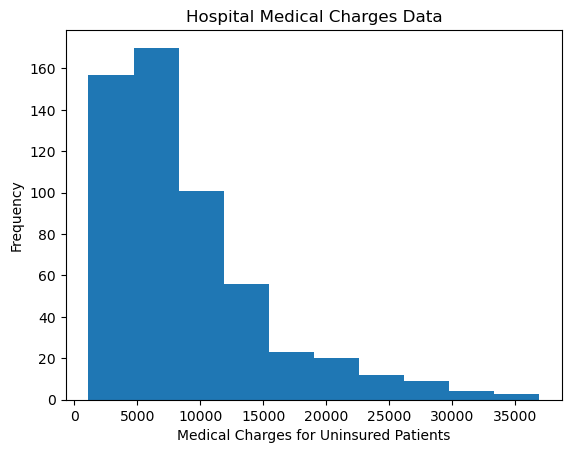

In [60]:
# a look at the histogram for uninsured patient medical charges

_=plt.hist(charges_uninsured)
_=plt.title("Hospital Medical Charges Data")
_=plt.xlabel("Medical Charges for Uninsured Patients")
_=plt.ylabel("Frequency")

Both distributions are not normal so bootstrapping will be applied.

In [62]:
# function to complete bootstrapping

def charges_mean_dist(sample, iterations):
    samples = np.empty((iterations,))
    for i in range(iterations):
        samples[i]=np.mean(np.random.choice(sample, len(sample)))
    return samples

est. mean:  16394.310019107084


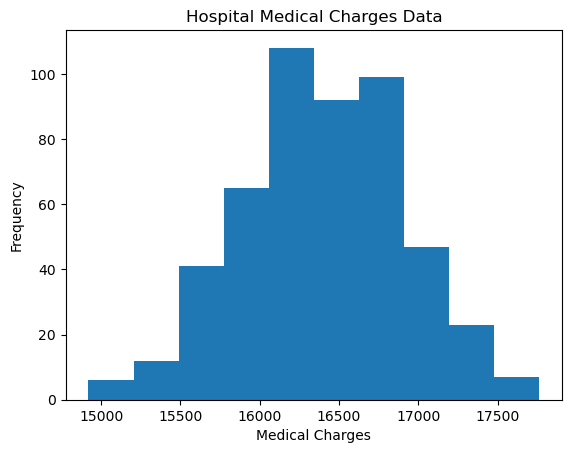

In [146]:
seed(1)
charges_insured_mean_dist = charges_mean_dist(charges_insured,500)
print('est. mean: ',np.mean(charges_insured_mean_dist))
_=plt.hist(charges_insured_mean_dist, bins=10)
_=plt.xlabel("Medical Charges")
_=plt.ylabel("Frequency")
_=plt.title("Hospital Medical Charges Data")

est. mean:  8813.087198872


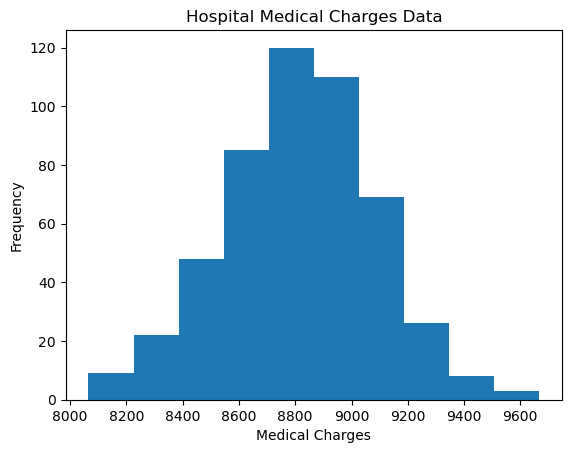

In [153]:
seed(1)
charges_uninsured_mean_dist = charges_mean_dist(charges_uninsured,500)
print('est. mean: ',np.mean(charges_uninsured_mean_dist))
_=plt.hist(charges_uninsured_mean_dist, bins=10)
_=plt.xlabel("Medical Charges")
_=plt.ylabel("Frequency")
_=plt.title("Hospital Medical Charges Data")

In [121]:
# Gather mean, standard deviation, and sample size once more

# cimd means charges_insured_mean_dist 

cimd_n = len(charges_insured_mean_dist)
cimd_mean = np.mean(charges_insured_mean_dist)
cimd_std = np.std(charges_insured_mean_dist, ddof=1)

# cumd means charges_uninsured_mean_dist

cumd_n = len(charges_uninsured_mean_dist)
cumd_mean = np.mean(charges_uninsured_mean_dist)
cumd_std = np.std(charges_uninsured_mean_dist,ddof=1)

dof = cimd_n + cumd_n - 2 

**Manual Calculation (using formulas above)**

In [140]:

    # Pooled standard deviation
pooled_std = np.sqrt(((cimd_n-1)*(cimd_std**2) + (cumd_n-1)*(cumd_std**2))\
                    /(cimd_n + cumd_n - 2))
print("Pooled standard deviation: ", pooled_std)



Pooled standard deviation:  402.49095976146236


In [154]:
    #t-statistic
pooled_t_stat = (cimd_mean - cumd_mean)\
                /(pooled_std *np.sqrt(((1/cimd_n)+(1/cumd_n))))
print("t-statistic: ", pooled_t_stat)

t-statistic:  298.4918802135019


In [160]:
    # Lower bound cirtical value 

t.ppf(.975, dof)*pooled_std

789.8256580456116

In [159]:
    # Upper bound cirtical value 

t.ppf(1-.975, dof)*pooled_std

-789.8256580456116

The calculated t-statistic lies within the boundaries of the critical values for a two tailed t-test with a 95% confidence interval, so we fail to reject the hypthesis that patients with and without insurance are charged equally.

**scipy.stats Function **

In [145]:
ttest_ind(charges_insured_mean_dist, charges_uninsured_mean_dist)

Ttest_indResult(statistic=298.4918802135019, pvalue=0.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The documentation for scipy does not show an equivalent function to perform a z-test. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test